In [47]:
import sys
sys.path.append('../../')

import numpy as np

In [48]:
from src.mechanism.llg_auction import LLGAuction
from src.game import Game
from src.strategy import Strategy
from src.learner.soda import SODA
from src.learner.frank_wolfe import FrankWolfe

In [61]:
# parameter mechanism
bidder = ['L', 'L', 'G']
o_space = {'L':[0,1], 'G':[0,2]}
a_space = {'L':[0,1], 'G':[0,2]}

param_prior = {'distribution':'uniform',
               'corr': 0.7}

param_util ={
    'payment_rule': 'NB',
    'tie_breaking': 'local',
            }

# parameter approximation game
n = 64
m = 64

# parameter learner
max_iter = int(1e3)
tol = 1e-5
steprule_bool = True
eta = 20
beta = 1/20

method = 'frank_wolfe'

In [62]:
# create mechanism
mechanism = LLGAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

# create learner
if method == 'soda':
    learner = SODA(max_iter, tol, steprule_bool, eta, beta)
elif method == 'frank_wolfe':
    learner = FrankWolfe(max_iter, tol, steprule_bool)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize(init_method='random')

In [63]:
# run soda
learner.run(mechanism, game, strategies)

 17%|███▍                | 170/1.00k [00:14<01:09, 12.0it/s] 

Convergence after 170 iterations
Relative utility loss 0.001 %


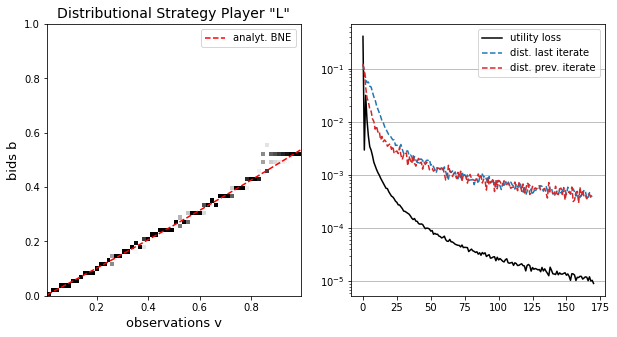

In [64]:
agent = 'L'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(True, bne)

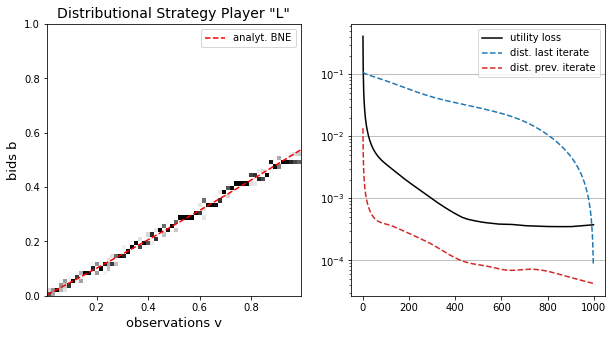

In [ ]:
agent = 'L'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(True, bne)